In [42]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np

# Yellow HSV
yellow_hsv_lower = np.array([85, 50, 50])
yellow_hsv_upper = np.array([94, 255, 255])

# Purple HSV
purple_hsv_lower = np.array([115, 0, 0])
purple_hsv_upper = np.array([140, 250, 250])


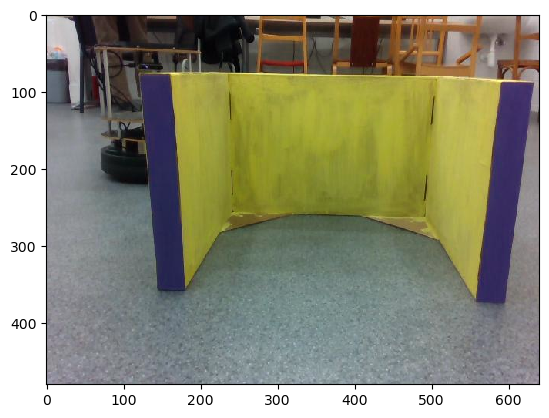

In [17]:
plt.imshow(test_img := cv2.imread("images/positive1.jpg"))

In [45]:
%matplotlib inline
def test_image(image, lower, upper) -> float:
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(image, lower, upper)
    return np.sum(mask)

def display_mask(fname, lower, upper) -> float:
    image = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(image, lower, upper)
    plt.imshow(mask)

test_image(test_img, yellow_hsv_lower, yellow_hsv_upper)

27540

array([ 32, 178, 149], dtype=uint8)

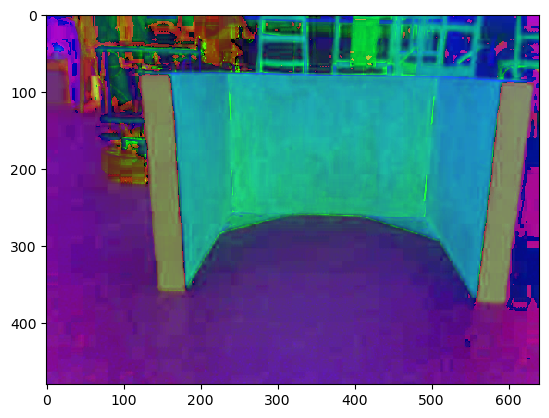

In [56]:
hsv_test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2HSV)[:, :, :]
plt.imshow(hsv_test_img)
hsv_test_img[200, 303]

In [55]:
s = 0
scores = []
for fname in os.listdir("images"):
    if "positive" in fname or not ".jpg" in fname:
        continue

    img = cv2.imread(f"images/{fname}")
    score = test_image(img, yellow_hsv_lower, yellow_hsv_upper)
    scores.append((fname, score))
    # print(f"{fname} score: {score}")
    s += score

scores.sort(key=lambda x: x[1])
scores

[('negative39.jpg', 0),
 ('negative45.jpg', 0),
 ('negative0.jpg', 255),
 ('negative40.jpg', 3570),
 ('negative38.jpg', 14535),
 ('negative4.jpg', 19635),
 ('negative44.jpg', 23460),
 ('negative46.jpg', 24735),
 ('negative17.jpg', 41310),
 ('negative18.jpg', 48450),
 ('negative43.jpg', 53040),
 ('negative51.jpg', 64515),
 ('negative42.jpg', 66810),
 ('negative21.jpg', 73695),
 ('negative15.jpg', 79560),
 ('negative32.jpg', 100980),
 ('negative50.jpg', 102000),
 ('negative52.jpg', 108630),
 ('negative10.jpg', 113475),
 ('negative16.jpg', 173400),
 ('negative41.jpg', 191250),
 ('negative37.jpg', 210885),
 ('negative1.jpg', 399330),
 ('negative3.jpg', 460785),
 ('negative19.jpg', 543150),
 ('negative2.jpg', 858075),
 ('negative20.jpg', 1022550),
 ('negative14.jpg', 1256640),
 ('negative5.jpg', 1301265),
 ('negative13.jpg', 1318095),
 ('negative22.jpg', 2254200),
 ('negative23.jpg', 2340900),
 ('negative12.jpg', 2668575),
 ('negative6.jpg', 2830755),
 ('negative49.jpg', 3439695),
 ('negati

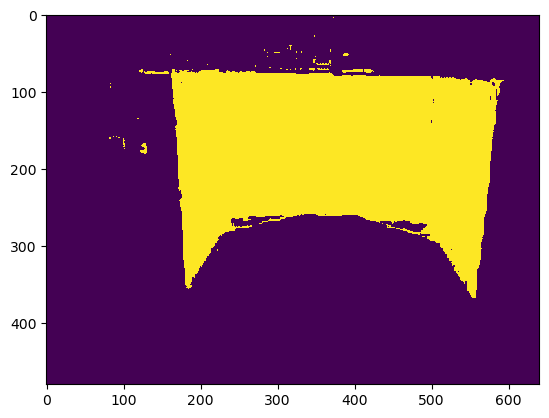

In [34]:
display_mask("images/positive1.jpg", yellow_hsv_lower, yellow_hsv_upper)

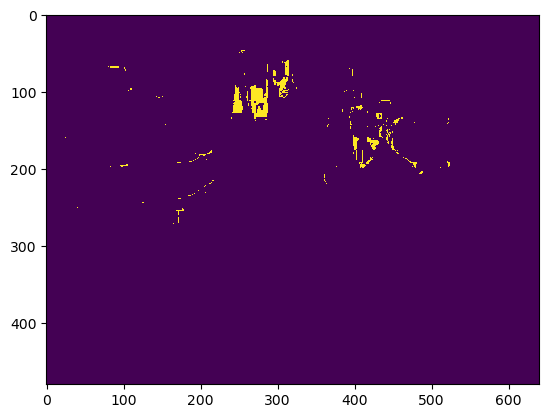

In [40]:
display_mask("images/negative18.jpg", yellow_hsv_lower, yellow_hsv_upper)